**Importing the necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset into the dataframe**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, names = column_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Feature and its Datatype**

In [ ]:
#feature datatypes
print("Feature and their types")
df.dtypes

Feature and their types


,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


Here, the 4 features i.e. 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' have Numerical data while 'species' has nominal/categorical.

**Histogram for each numerical feature**

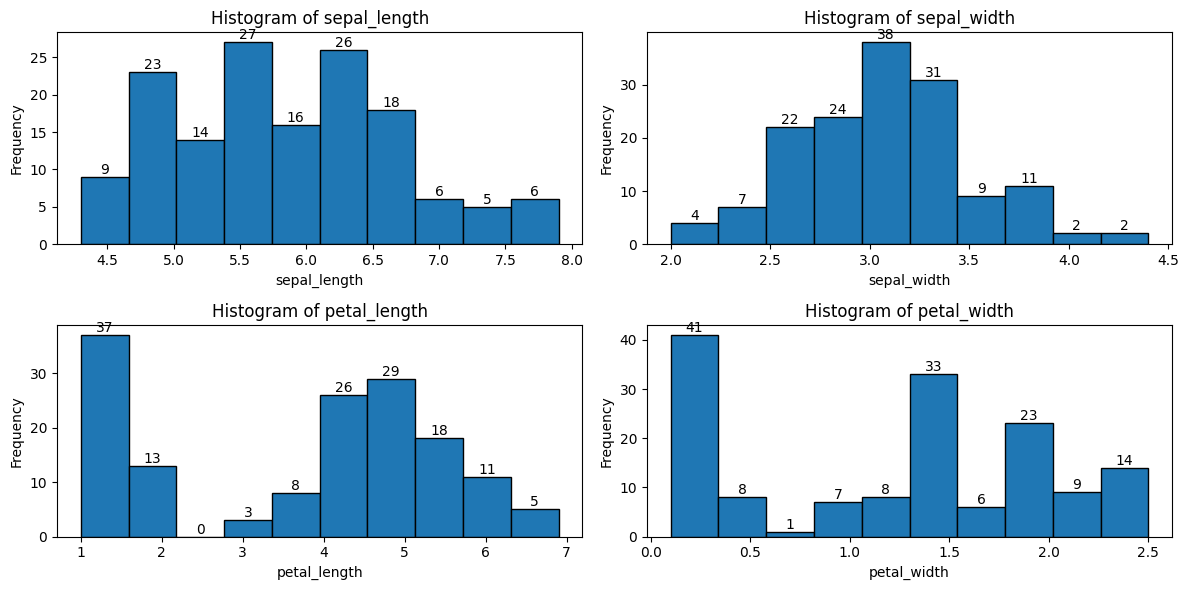

In [ ]:
plt.figure(figsize=(12, 6))

for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    plt.subplot(2, 2, i + 1)

    ax = plt.hist(df[column], edgecolor="black")
    plt.gca().bar_label(plt.gca().containers[0], fmt='%d')  # Add count labels
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


A histogram is a graphical representation of the distribution of a dataset, where data is grouped into bins, and the height of each bar represents the frequency of values within each bin.

**Identifying outliers using BoxPlot**

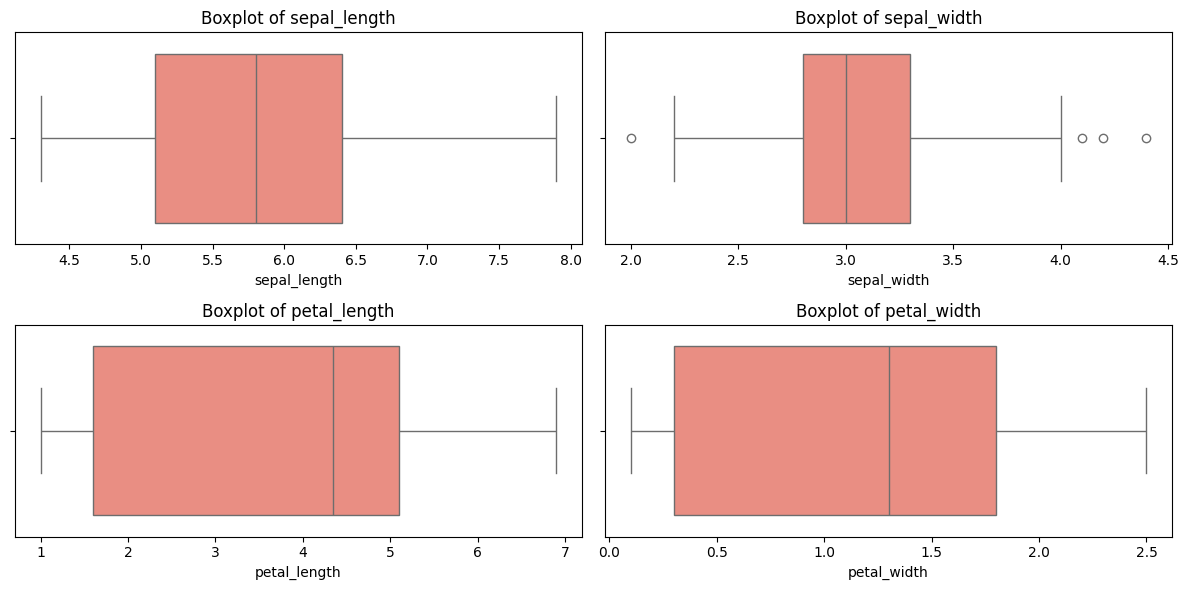

In [ ]:
# --- Boxplots for Each Feature ---
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    ax = plt.subplot(2, 2, i + 1)
    # Create boxplot and store it in a container
    box_container = sns.boxplot(x=df[column], ax=ax, color='salmon')
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

A boxplot visually represents the distribution of a dataset using five key statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum, with potential outliers shown as individual points.

**Detecting outlier for each feature**

In [ ]:
for column in df.columns[:-1]:  # Exclude 'species' column
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    print(f"\nFeature: {column}")
    print(f"  Mean: {df[column].mean():.2f}, Median: {df[column].median():.2f}, Std Dev: {df[column].std():.2f}")
    print(f"  Outliers Detected: {'Yes' if not outliers.empty else 'No'}","\n  " f"Outlier Values: {outliers.tolist()}" if not outliers.empty else "")
    print("-" * 40)



Feature: sepal_length
  Mean: 5.84, Median: 5.80, Std Dev: 0.83
  Outliers Detected: No 
----------------------------------------

Feature: sepal_width
  Mean: 3.05, Median: 3.00, Std Dev: 0.43
  Outliers Detected: Yes 
  Outlier Values: [4.4, 4.1, 4.2, 2.0]
----------------------------------------

Feature: petal_length
  Mean: 3.76, Median: 4.35, Std Dev: 1.76
  Outliers Detected: No 
----------------------------------------

Feature: petal_width
  Mean: 1.20, Median: 1.30, Std Dev: 0.76
  Outliers Detected: No 
----------------------------------------


**Violin Plot**

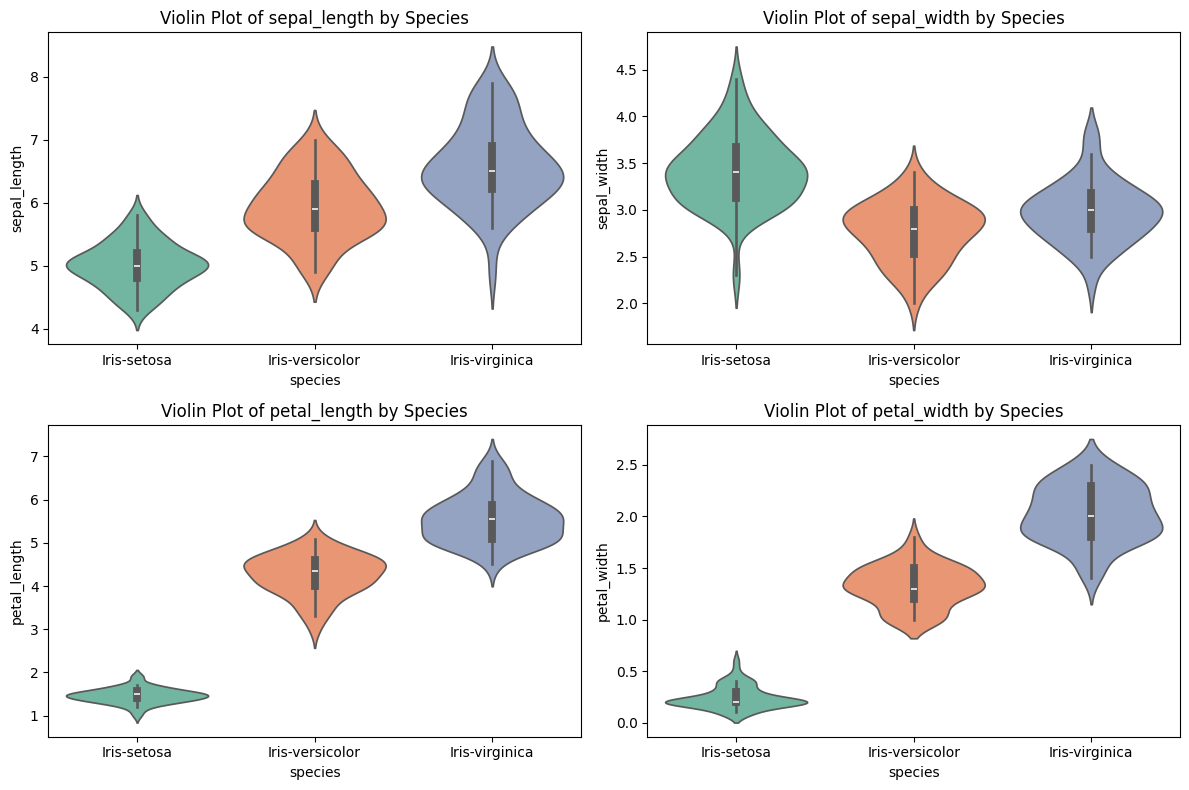

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=df["species"], y=df[column], palette="Set2", hue=df['species'])
    plt.title(f"Violin Plot of {column} by Species")

plt.tight_layout()
plt.show()

A violin plot combines a boxplot with a density plot, showing the distribution, median, quartiles, and the overall shape of the data.

**PairPlot**

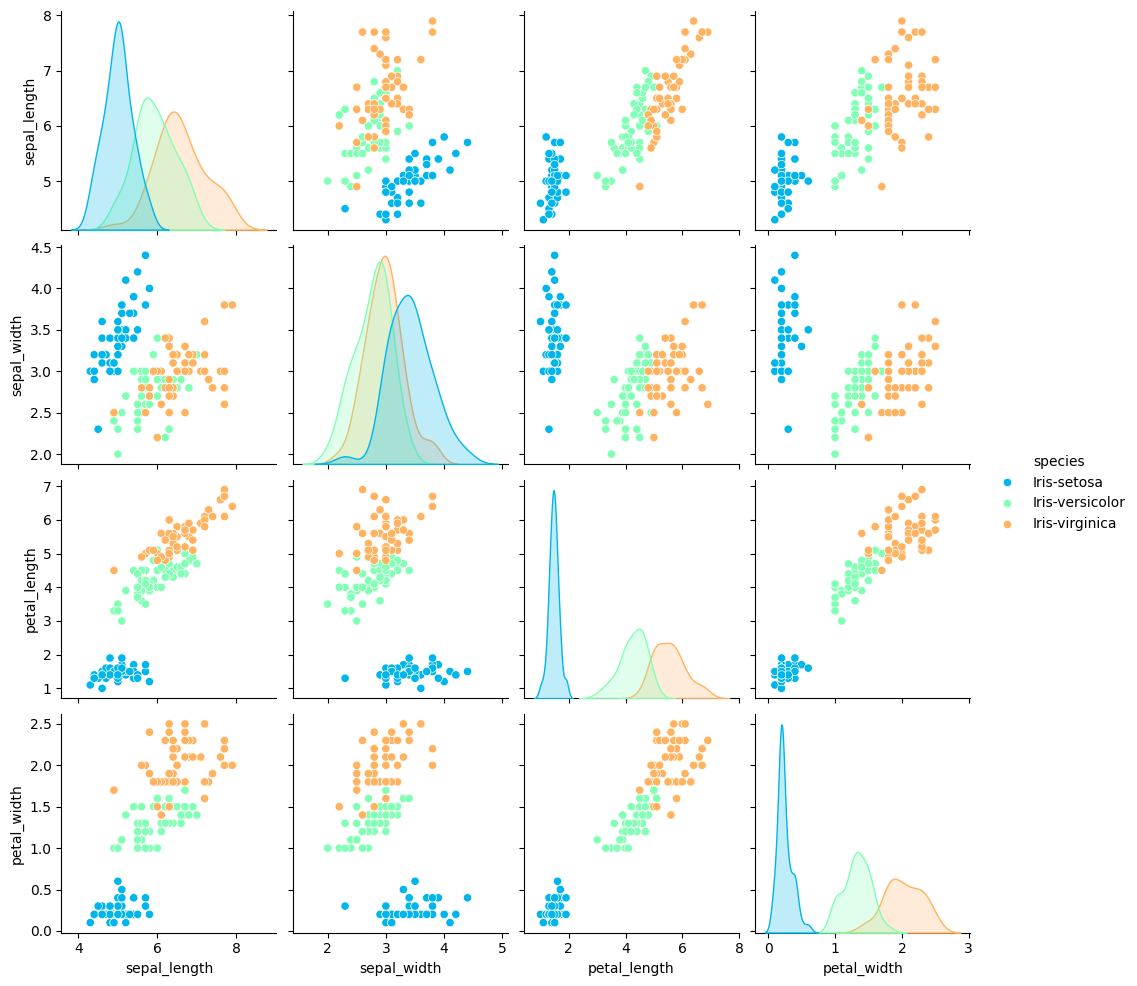

In [ ]:
sns.pairplot(df, hue="species", palette="rainbow")
plt.show()

A pair plot displays scatter plots for all possible feature combinations in a dataset, helping visualize relationships between variables.

**Conclusion**

1. The Iris dataset consists of four numerical features (sepal length, sepal width, petal length, and petal width) and one categorical feature (species), which includes three classes: Setosa, Versicolor, and Virginica.

2. Histograms and boxplots revealed the distribution of each feature, with sepal width showing some outliers, identified using the IQR method.

3. Violin plots demonstrated the variation of different features across species, showing that Setosa is distinct from the other two species, while Versicolor and Virginica overlap in some features.

4. The pair plot indicated strong correlations, especially between petal length and petal width, confirming that these features contribute significantly to species classification.

The analysis helped visualize data distribution, identify outliers, and understand feature relationships, providing insights for further classification tasks.